## <mark><span style = "color:red">***Titanic : Survival prediction*** </span> </mark>
#### _the goal is to correctly predict if someone survived the shipwreck_ 

## <mark>1.Importing Liberary</mark>

In [18]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None) # To display all columns in the dataframe

## <mark>2.Reading data </mark>

In [19]:
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv") 

In [21]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## <mark>3.data Cleaning </mark>

><mark>Filtering Out unnecessary columns</mark> 
>>drop name,Ticket, and Cabin number because it is not useful

In [27]:
df_train.drop(columns=['Name' , 'Ticket', 'Cabin'] , inplace=True) 
df_test.drop(columns=['Name' , 'Ticket', 'Cabin'] , inplace=True)

><mark>Rename some columns</mark>

In [34]:
df_train.rename(columns= {'PassengerId' : 'ID' , 'Pclass' : 'class' , 'SibSp': 'Sibiling_Spouse' , 'Parch' : 'Parent_Child' , 'Embarked' : 'Port'} , inplace= True)
df_test.rename(columns= {'PassengerId' : 'ID' , 'Pclass' : 'class' , 'SibSp': 'Sibiling_Spouse' , 'Parch' : 'Parent_Child' , 'Embarked' : 'Port'} , inplace= True) 

><mark>make Id is the the index</mark> 

In [ ]:
df_train.set_index('ID' , inplace=True)

In [45]:
df_test.set_index('ID' , inplace=True)

><mark>Missing value Check</mark>

In [48]:
df_train.isna().sum()

Survived             0
class                0
Sex                  0
Age                177
Sibiling_Spouse      0
Parent_Child         0
Fare                 0
Port                 2
dtype: int64

In [55]:
df_train[df_train['Port'].isna() ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port
ID,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


In [56]:
df_train[df_train['Age'].isna() ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port
ID,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,Q
18,1,2,male,NaN,0,0,13.0000,S
20,1,3,female,NaN,0,0,7.2250,C
27,0,3,male,NaN,0,0,7.2250,C
29,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
860,0,3,male,NaN,0,0,7.2292,C
864,0,3,female,NaN,8,2,69.5500,S
869,0,3,male,NaN,0,0,9.5000,S


In [57]:
df_train[df_train['Age'].isna() & df_train['Port'].isna()  ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port
ID,,,,,,,,


>no intersection between missing value of 'Age'  and 'Port' so total rows that has 'Nan' is 179 row

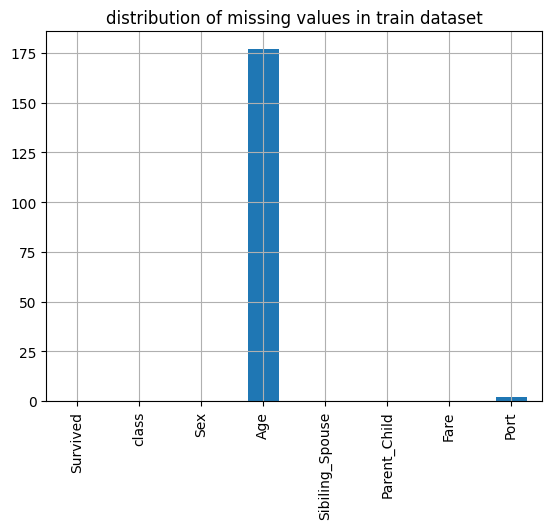

In [65]:
df_train.isna().sum().plot(kind='bar')
plt.title('distribution of missing values in train dataset')
plt.grid()
plt.show()

In [70]:
df_train.describe()

,Survived,class,Age,Sibiling_Spouse,Parent_Child,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

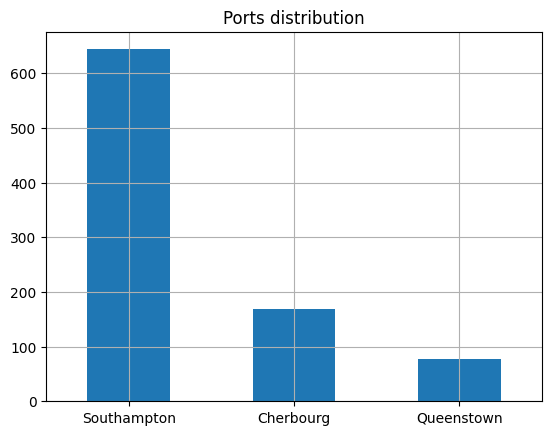

In [77]:
PortHistGraph= df_train['Port'].value_counts().plot(kind='bar')
plt.title('Ports distribution')
plt.grid()
PortHistGraph.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], rotation = 0)

>most of the passenger get on board from southampton

>drawing histograms for other numeric columns

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'class'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sibiling_Spouse'}>],
       [<Axes: title={'center': 'Parent_Child'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

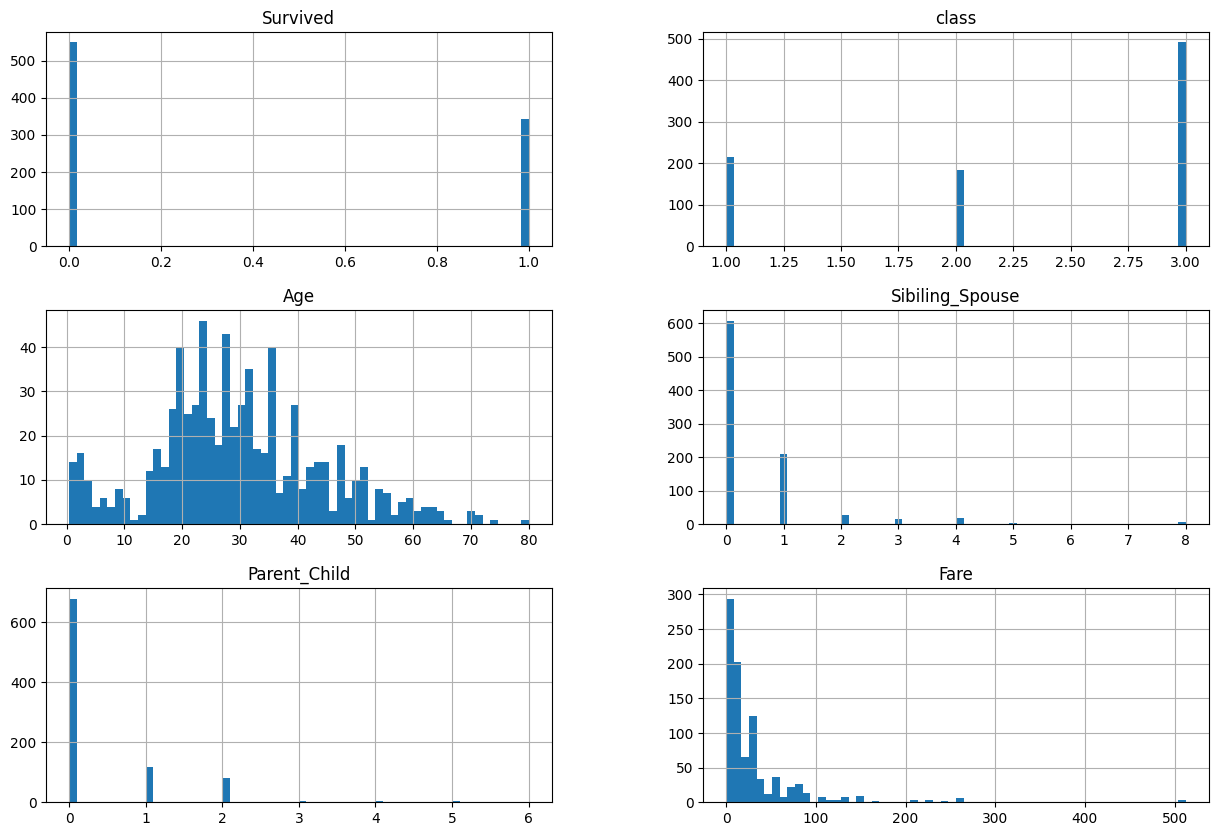

In [79]:
df_train.hist(bins = 60 , figsize=(15,10)) 

>Replacing the missing value in 'Age' and 'Port' columns according the<a href= "https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/"> distribution of data  </a>

Text(0.5, 1.0, 'Age box plot distribution')

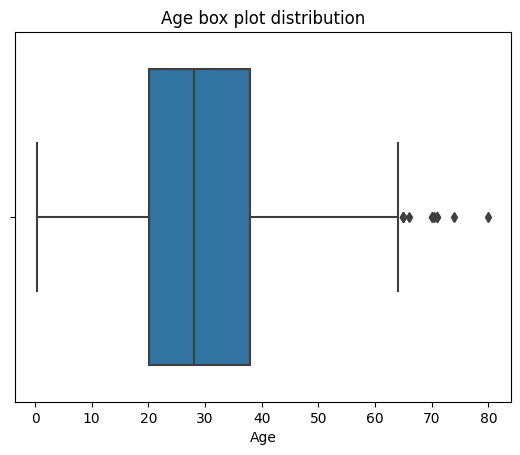

In [82]:
sb.boxplot(x='Age' , data=df_train)
plt.title('Age box plot distribution')


>Since, there exit lots of outliers, replacing missing values with the mean is not the best thing because outlier effects the mean , we wil use median instead

In [83]:
df_train['Age'].fillna(df_train['Age'].median() , inplace=True)

In [90]:
df_train['Port'].fillna('S' , inplace=True)

In [91]:
df_train.isna().sum()

Survived           0
class              0
Sex                0
Age                0
Sibiling_Spouse    0
Parent_Child       0
Fare               0
Port               0
dtype: int64

## <mark>4.data Exploring </mark>

>Exploring the relation between survivals and every coloumn in the graph

><mark>1.Survival Vs class </mark>

Text(0.5, 0, 'Class , Survival')

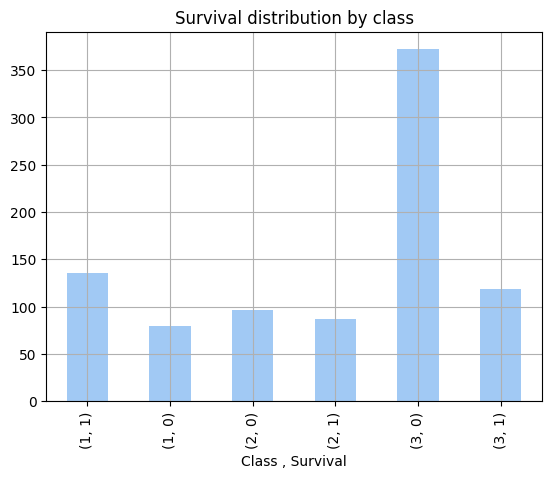

In [131]:
graph = df_train.groupby('class')['Survived'].value_counts().plot(kind='bar')
plt.title('Survival distribution by class')
plt.grid()
plt.xlabel('Class , Survival')

<Axes: xlabel='class', ylabel='count'>

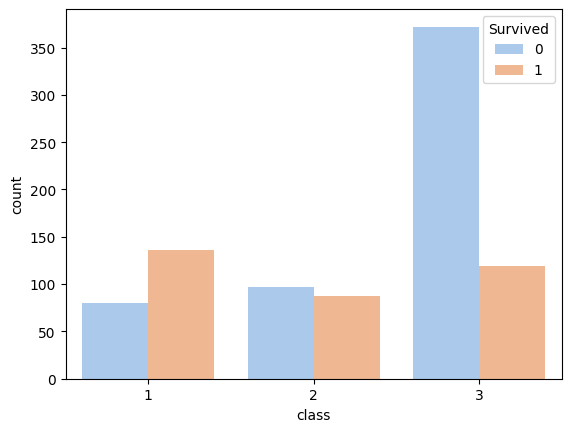

In [128]:
sb.countplot(x='class', hue='Survived' , data=df_train)

In [135]:
df_train.groupby('class')['Survived'].value_counts(normalize=True)

class  Survived
1      1           0.629630
       0           0.370370
2      0           0.527174
       1           0.472826
3      0           0.757637
       1           0.242363
Name: Survived, dtype: float64

<div class="alert alert-block alert-success">
<b>Conclusion 1:</b> from above graphs and table passengers from 1st class are having a highest chance of survival (62.96%) , On the other hand , the lowest chance to survival are to 3rd class (24.23%)
</div>

><mark>1.Survival Vs Sex </mark>

Text(0.5, 1.0, 'female  and make distribution')

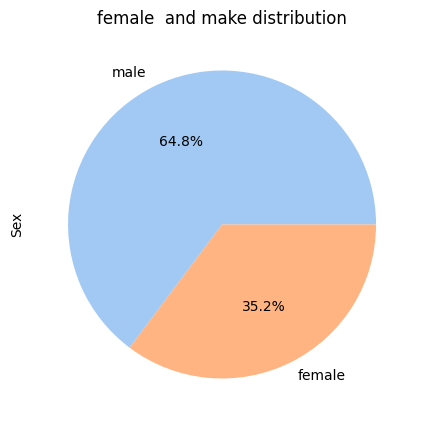

In [145]:
df_train['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%' , figsize=(5,5))
plt.title('female  and make distribution')

<Axes: xlabel='Sex'>

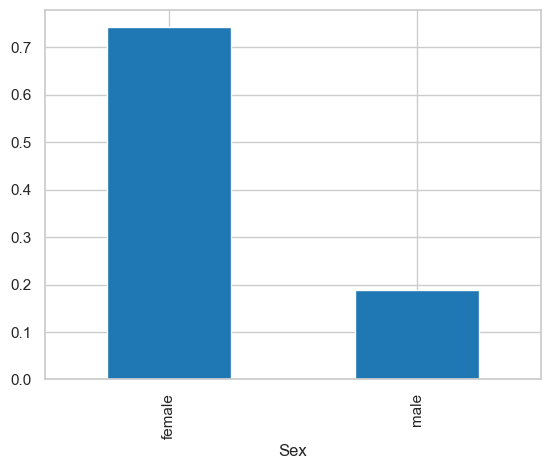

In [152]:
sb.set_context('notebook')
sb.set_palette('tab10')
df_train.groupby('Sex').mean()['Survived'].plot(kind='bar')


In [188]:
df_train.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

<div class="alert alert-block alert-success">
<b>Conclusion 2:</b> from the above table Females have higher chance of survival  (74.2038 % )
</div>

><mark>3.Survival Vs Parent_child</mark>

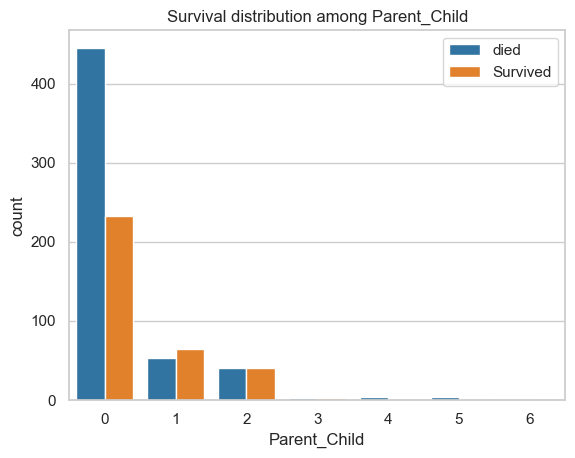

In [209]:
sb.countplot(x=df_train['Parent_Child'], hue=df_train['Survived'])
plt.title('Survival distribution among Parent_Child')
plt.legend(labels=['died', 'Survived'])

In [207]:
df_train.groupby('Parent_Child')['Survived'].value_counts(normalize=True).sort_index(ascending=True)

Parent_Child  Survived
0             0           0.656342
              1           0.343658
1             0           0.449153
              1           0.550847
2             0           0.500000
              1           0.500000
3             0           0.400000
              1           0.600000
4             0           1.000000
5             0           0.800000
              1           0.200000
6             0           1.000000
Name: Survived, dtype: float64

<div class="alert alert-block alert-success">
<b>Conclusion 3:</b>It seems that there is no exact relation between increasing the number of parents and number of survival because the percentages of if survival increase until it reaches '3' then decrease again
</div>

><mark>4.Survival Vs Sibiling_Spouse</mark>

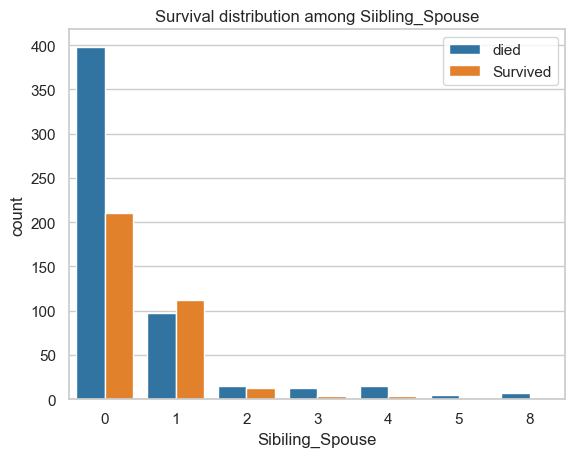

In [214]:
sb.countplot(x=df_train['Sibiling_Spouse'], hue=df_train['Survived'])
plt.title('Survival distribution among Siibling_Spouse')
plt.legend(labels=['died', 'Survived'])

In [216]:
df_train.groupby('Sibiling_Spouse')['Survived'].value_counts(normalize=True).sort_index(ascending=True)

Sibiling_Spouse  Survived
0                0           0.654605
                 1           0.345395
1                0           0.464115
                 1           0.535885
2                0           0.535714
                 1           0.464286
3                0           0.750000
                 1           0.250000
4                0           0.833333
                 1           0.166667
5                0           1.000000
8                0           1.000000
Name: Survived, dtype: float64

<div class="alert alert-block alert-success">
<b>Conclusion 4:</b> same as conclusion number 3 there is no exact relation between number of spouse/Sibiling and the survival</div>

><mark>5.Survival Vs Age</mark>